<a href="https://colab.research.google.com/github/Ashish-Abraham/LLM-Boilerplate/blob/main/Qdrant/QdrantEcomRecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !huggingface-cli login

#Data Cleaning

In [ ]:
import pandas as pd

# Define the URL of the raw CSV file
path = "https://raw.githubusercontent.com/luminati-io/eCommerce-dataset-samples/main/shein-products.csv"
# Read the CSV into a pandas DataFrame
df = pd.read_csv(path)

# Display the first few rows of the DataFrame to verify
#df=df.head(400)
display(df.head())

,product_name,description,initial_price,final_price,currency,in_stock,color,size,reviews_count,main_image,...,offers,other_attributes,product_id,rating,related_products,root_category,top_reviews,category,brand,all_available_sizes
0,Tall Narrow Bathroom Storage Cabinet With 3 Dr...,Free Returns ✓ Free Shipping✓. Tall Narrow Bat...,120.99,120.99,USD,True,Grey,one-size,0,https://img.ltwebstatic.com/images3_spmp/2024/...,...,NaN,"[{""name"":""Color"",""value"":""Grey""},{""name"":""Mate...",40460214,0,NaN,Tools & Home Improvement,NaN,Storage Cabinets,SHEIN,"[""one-size""]"
1,"1PC Natural Yellow Rainbow Halo Raw Crystal, A...",Free Returns ✓ Free Shipping✓. 1PC Natural Yel...,2.10,2.10,USD,True,Multicolor,Electroplated Citrine,0,https://img.ltwebstatic.com/images3_spmp/2024/...,...,NaN,"[{""name"":""Color"",""value"":""Multicolor""},{""name""...",40351123,0,NaN,Jewelry & Watches,NaN,Crystal Shapes & Carvings,SHEIN,"[""Electroplated Citrine""]"
2,1PC Sexy Lingerie Body StockingOpen Crotch Hol...,Free Returns ✓ Free Shipping✓. 1PC Sexy Linger...,3.39,2.14,USD,True,Black,one-size,0,https://img.ltwebstatic.com/images3_spmp/2024/...,...,NaN,"[{""name"":""Details"",""value"":""Cut Out""},{""name"":...",40433938,0,NaN,Underwear & Sleepwear,NaN,Women Sexy Bodysuits,SHEIN,"[""one-size""]"
3,"Italian Genuine Leather Thick Belt For Men, Re...",Free Returns ✓ Free Shipping✓. Italian Genuine...,22.80,21.30,USD,True,Black,one-size,0,https://img.ltwebstatic.com/images3_spmp/2024/...,...,NaN,"[{""name"":""Color"",""value"":""Black""},{""name"":""Mat...",39962322,0,NaN,Men,NaN,Men Belts,SHEIN,"[""one-size""]"
4,Unbeatablesale Hylomar 61701 13.53 Oz Hylomar ...,Free Returns ✓ Free Shipping✓. Unbeatablesale ...,28.53,28.53,USD,True,Multicolor,one-size,0,https://img.ltwebstatic.com/images3_spmp/2024/...,...,NaN,"[{""name"":""Color"",""value"":""Multicolor""},{""name""...",39788871,0,NaN,Home & Living,NaN,Other Commercial Cleaning Supplies,Unbeatablesale,"[""one-size""]"


In [ ]:
df["root_category"].unique()

array(['Tools & Home Improvement', 'Jewelry & Watches',
       'Underwear & Sleepwear', 'Men', 'Home & Living', 'Beauty & Health',
       'Bags & Luggage', 'Automotive', 'Home Textile',
       'Office & School Supplies', 'Apparel Accessories',
       'Sports & Outdoor', 'Pet Supplies', 'Toys & Games', 'Kids',
       'Women Apparel', 'Home Appliances', 'Baby', 'Shoes', 'Electronics',
       'Cell Phones & Accessories'], dtype=object)

In [ ]:
df["category"].unique()

array(['Storage Cabinets', 'Crystal Shapes & Carvings',
       'Women Sexy Bodysuits', 'Men Belts',
       'Other Commercial Cleaning Supplies', 'Teacup & Saucer Sets',
       'Tool Cases', 'Decorative Balloons', 'Artificial Plants',
       'Wrapping & Packaging', 'Decorative Crafts',
       'Rhinestones & Decorations', 'Storage Drawers', 'Sockets',
       'Travel Glasses Bag', 'Women Tongue Ring', 'Perfume',
       'Car Replacement Parts', 'Men Tote Bags', 'Cushion Cover',
       'Notebooks', 'Colored Pencils', 'Fine Pendant Necklaces',
       'Jewelry Making Findings', 'Other Tool Organizers', 'Handwear',
       'Party Games & Activities', 'Wall Decoration', 'Jewelry Boxes',
       'Artificial Flowers', 'Other Sports Accessories', 'Coat Racks',
       'Table Decorative Ornaments', 'Cycling Mask & Scarf',
       'Disposable Tableware Sets', 'Horse Grooming & Bathing Supplies',
       'Hair Bands', 'Synthetic Extensions', 'Other Party Supplies',
       'Watering Kits', 'Mops and Mop Se

In [ ]:
df['description'] = df['description'].str.replace('Free Returns ✓ Free Shipping✓.', '', regex=False).str.strip()
display(df['description'].head())

,description
0,Tall Narrow Bathroom Storage Cabinet With 3 Dr...
1,"1PC Natural Yellow Rainbow Halo Raw Crystal, A..."
2,1PC Sexy Lingerie Body StockingOpen Crotch Hol...
3,"Italian Genuine Leather Thick Belt For Men, Re..."
4,Unbeatablesale Hylomar 61701 13.53 Oz Hylomar ...


In [ ]:
len(df)

1000

In [ ]:
df["main_image"][0]

'https://img.ltwebstatic.com/images3_spmp/2024/08/09/e4/17231883609d35f827fa9cc1016466bcd0d72748bd_square.png'

In [ ]:
display(df.columns)

Index(['product_name', 'description', 'initial_price', 'final_price',
       'currency', 'in_stock', 'color', 'size', 'reviews_count', 'main_image',
       'category_url', 'url', 'category_tree', 'country_code', 'domain',
       'image_count', 'image_urls', 'model_number', 'offers',
       'other_attributes', 'product_id', 'rating', 'related_products',
       'root_category', 'top_reviews', 'category', 'brand',
       'all_available_sizes'],
      dtype='object')

In [ ]:
# Check for missing values
display(df.isnull().sum())

,0
product_name,0
description,0
initial_price,0
final_price,0
currency,0
in_stock,0
color,63
size,0
reviews_count,0
main_image,0


In [ ]:
df = df.dropna(subset=['color'])
display(df.isnull().sum())

,0
product_name,0
description,0
initial_price,0
final_price,0
currency,0
in_stock,0
color,0
size,0
reviews_count,0
main_image,0


In [ ]:
df["image_urls"][0]

'["https://img.ltwebstatic.com/images3_spmp/2024/08/09/e4/17231883609d35f827fa9cc1016466bcd0d72748bd_square.png","https://img.ltwebstatic.com/images3_spmp/2024/08/09/e8/17231883595b2bf13a8cd40bd8eaf0d01bac0ea8ae_square.png","https://img.ltwebstatic.com/images3_spmp/2024/08/09/e8/1723188359e751e010d76e843c58d20eafb63b698c_square.png","https://img.ltwebstatic.com/images3_spmp/2024/08/09/e8/1723188359fe45d88555308442379166d74380c837_square.png","https://img.ltwebstatic.com/images3_spmp/2024/08/09/24/172318835752c2b6acbfe9a1ae23633b443b146c87_square.png","https://img.ltwebstatic.com/images3_spmp/2024/08/09/e8/17231883594a5a941da7aef8da9f5eff05e1bc16b9_square.png","https://img.ltwebstatic.com/images3_spmp/2024/08/09/e8/1723188359baa5d09ddbd42fab7a418d750674a84b_square.png","https://img.ltwebstatic.com/images3_spmp/2024/08/09/42/1723188363771c934b47f76b5e1c0d606e5d2ba22c_square.png"]'

In [ ]:
import os
import urllib
import pandas as pd
import numpy as np
import json
from typing import Optional

def download_images_for_row(row, base_folder="data/images") -> Optional[str]:
    folder_name = str(row.name)
    folder_path = os.path.join(base_folder, folder_name)
    os.makedirs(folder_path, exist_ok=True)

    urls = []
    # Handle main_image
    main_image = row.get("main_image")
    if isinstance(main_image, str) and main_image.startswith("http"):
        urls.append(main_image)

    # Handle image_urls (should be a stringified list)
    image_urls_raw = row.get("image_urls")
    try:
        image_urls = json.loads(image_urls_raw) if isinstance(image_urls_raw, str) else []
        if isinstance(image_urls, list):
            urls.extend(image_urls)
    except Exception as e:
        print(f"Failed to parse image_urls: {e}")

    # Download images
    for i, url in enumerate(urls):
        try:
            ext = os.path.splitext(url)[-1].split("?")[0]
            filename = f"image_{i}{ext or '.jpg'}"
            filepath = os.path.join(folder_path, filename)
            if not os.path.exists(filepath):
                urllib.request.urlretrieve(url, filepath)
        except Exception as e:
            print(f"Failed to download {url}: {e}")

    if os.listdir(folder_path):  # At least one image downloaded
        return folder_path
    return None

# Apply to each row
df["image_folder_path"] = df.apply(download_images_for_row, axis=1)

# Drop rows with failed downloads
df = df.dropna(subset=["image_folder_path"])

# Preview sample
display(df[["main_image", "image_folder_path"]].sample(5).T)


Failed to download https://img.ltwebstatic.com/images3_spmp/2024/08/19/97/17240508083afc4ab69938889190983f6528390720_square.jpg: <urlopen error retrieval incomplete: got only 30052 out of 56775 bytes>


,896,277,424,879,759
main_image,https://img.ltwebstatic.com/images3_spmp/2024/...,https://img.ltwebstatic.com/images3_spmp/2024/...,https://img.ltwebstatic.com/images3_pi/2024/06...,https://img.ltwebstatic.com/images3_spmp/2024/...,https://img.ltwebstatic.com/images3_spmp/2024/...
image_folder_path,data/images/896,data/images/277,data/images/424,data/images/879,data/images/759


In [ ]:
documents = []
for _, row in df.iterrows():
    doc_text = ""
    if pd.notna(row.get('product_name')):
        doc_text += str(row['product_name'])
    if pd.notna(row.get('description')):
        if doc_text:
            doc_text += " " + str(row['description'])
        else:
            doc_text = str(row['description'])
    if pd.notna(row.get('category')):
        doc_text += " " + str(row['category'])

    documents.append(doc_text)

print(f"Processing {len(documents)} documents...")

Processing 937 documents...


##Data Ingestion

In [ ]:
!pip install qdrant-client datasets fastembed transformers qdrant-client[fastembed] openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.3/337.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.8/324.8 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.6 MB/s eta 0:00:00


In [ ]:
from qdrant_client import models,QdrantClient
from datasets import load_dataset
from google.colab import userdata
import numpy as np
import torch

client = QdrantClient(
    url="https://e0179a00-e342-44cc-baf9-5057ca684538.us-east4-0.gcp.cloud.qdrant.io:6333",
    api_key=userdata.get('qdrant'),
    #cloud_inference=True # Removed this line
)

print(client.get_collections())

collections=[CollectionDescription(name='shein_products')]


## Embedding Generation

In [ ]:
from fastembed import TextEmbedding, LateInteractionTextEmbedding, SparseTextEmbedding, ImageEmbedding

In [ ]:
dense_embedding_model = TextEmbedding("sentence-transformers/all-MiniLM-L6-v2")
minicoil_embedding_model = SparseTextEmbedding("Qdrant/minicoil-v1")
late_interaction_embedding_model = LateInteractionTextEmbedding("colbert-ir/colbertv2.0")
clip_embedding_model = ImageEmbedding(model_name="Qdrant/clip-ViT-B-32-vision")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

minicoil.triplet.model.npy:   0%|          | 0.00/157M [00:00<?, ?B/s]

minicoil.triplet.model.vocab: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/130M [00:00<?, ?B/s]

stopwords.txt:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.onnx:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model.onnx:   0%|          | 0.00/352M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/780 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

In [ ]:
print("Computing dense embeddings...")
dense_embeddings = list(dense_embedding_model.embed(doc for doc in documents))

print("Computing sparse embeddings...")
minicoil_embeddings = list(minicoil_embedding_model.embed(doc for doc in documents))

print("Computing late interaction embeddings...")
late_interaction_embeddings = list(late_interaction_embedding_model.embed(doc for doc in documents))



Computing dense embeddings...
Computing sparse embeddings...
Computing late interaction embeddings...


In [ ]:
def get_average_image_embedding(folder_path: str) -> Optional[np.ndarray]:
    """Get average embedding of all images in a folder"""
    if not os.path.exists(folder_path):
        return None

    image_files = [f for f in os.listdir(folder_path)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.webp'))]

    if not image_files:
        return None

    image_paths = [os.path.join(folder_path, f) for f in image_files]

    try:
        # Get embeddings for all images in the folder
        embeddings = list(clip_embedding_model.embed(image_paths))

        if embeddings:
            # Convert to numpy arrays and compute average
            embedding_arrays = [np.array(emb) for emb in embeddings]
            average_embedding = np.mean(embedding_arrays, axis=0)
            return average_embedding

    except Exception as e:
        print(f"Error processing images in {folder_path}: {e}")
        return None

    return None

In [ ]:
print("Computing image embeddings...")
image_embeddings = []
for _, row in df.iterrows():
    folder_path = row['image_folder_path']
    avg_embedding = get_average_image_embedding(folder_path)
    image_embeddings.append(avg_embedding)

# Filter out None values and keep track of valid indices
valid_indices = [i for i, emb in enumerate(image_embeddings) if emb is not None]
valid_image_embeddings = [image_embeddings[i] for i in valid_indices]

print(f"Successfully computed embeddings for {len(valid_image_embeddings)} products with images")


Computing image embeddings...


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Successfully computed embeddings for 937 products with images


In [ ]:
print("\nEmbedding shapes:")
print(f"Dense embeddings: {np.array(dense_embeddings[0]).shape}")
print(f"miniCOIL embeddings: {np.array(minicoil_embeddings[0]).shape} sparse dimensions")
print(f"Late interaction embeddings: {np.array(late_interaction_embeddings[0]).shape}")
if valid_image_embeddings:
    print(f"Image embeddings: {valid_image_embeddings[0].shape}")

print(f"\nDataFrame shape: {df.shape}")


Embedding shapes:
Dense embeddings: (384,)
miniCOIL embeddings: () sparse dimensions
Late interaction embeddings: (180, 128)
Image embeddings: (512,)

DataFrame shape: (937, 29)


In [ ]:
df["dense_embedding"] = dense_embeddings
df["late_interaction_embedding"] = late_interaction_embeddings
df["image_embedding"] = image_embeddings
df["sparse_embedding"] = minicoil_embeddings

In [ ]:
from qdrant_client.models import Distance, VectorParams, models

client.recreate_collection(
    "shein_products",
    vectors_config={
        "all-MiniLM-L6-v2": models.VectorParams(
            size=len(dense_embeddings[0]),
            distance=models.Distance.COSINE,
        ),
        "colbertv2.0": models.VectorParams(
            size=len(late_interaction_embeddings[0][0]),
            distance=models.Distance.COSINE,
            multivector_config=models.MultiVectorConfig(
                comparator=models.MultiVectorComparator.MAX_SIM,
            ),
            hnsw_config=models.HnswConfigDiff(m=0)  # Disable HNSW for reranking
        ),
        "clip": VectorParams(size=512, distance=Distance.COSINE)
    },
    sparse_vectors_config={
        "minicoil": models.SparseVectorParams(
            modifier=models.Modifier.IDF
        )
    },
    quantization_config=models.ScalarQuantization(
        scalar=models.ScalarQuantizationConfig(
            type=models.ScalarType.INT8,
            quantile=0.99,
            always_ram=True,
        ),
    ),
)

"""
#Estimating the average length of the documents in the corpus
avg_documents_length = sum(len(document.split()) for document in documents) / len(documents)

client.upsert(
    collection_name="{minicoil_collection_name}",
    points=[
        models.PointStruct(
            id=i,
            payload={
                "text": documents[i]
            },
            vector={
                # Sparse miniCOIL vectors
                "minicoil": models.Document(
                    text=documents[i],
                    model="Qdrant/minicoil-v1",
                    options={"avg_len": avg_documents_length}
                    #Average length of documents in the corpus
                     # (a part of the BM25 formula on which miniCOIL is built)
                )
            },
        )
        for i in range(len(documents))
    ],
)

query = "Vectors in Medicine"

client.query_points(
    collection_name="{minicoil_collection_name}",
    query=models.Document(
        text=query,
        model="Qdrant/minicoil-v1"
    ),
    using="minicoil",
    limit=1
)
"""

/tmp/ipython-input-28-2616250152.py:3: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  client.recreate_collection(


'\n#Estimating the average length of the documents in the corpus\navg_documents_length = sum(len(document.split()) for document in documents) / len(documents)\n\nclient.upsert(\n    collection_name="{minicoil_collection_name}",\n    points=[\n        models.PointStruct(\n            id=i,\n            payload={\n                "text": documents[i]\n            },\n            vector={\n                # Sparse miniCOIL vectors\n                "minicoil": models.Document(\n                    text=documents[i],\n                    model="Qdrant/minicoil-v1",\n                    options={"avg_len": avg_documents_length}\n                    #Average length of documents in the corpus\n                     # (a part of the BM25 formula on which miniCOIL is built)\n                )\n            },\n        )\n        for i in range(len(documents))\n    ],\n)\n\nquery = "Vectors in Medicine"\n\nclient.query_points(\n    collection_name="{minicoil_collection_name}",\n    query=models.Doc

In [ ]:
client.create_payload_index(
    collection_name="shein_products",
    field_name="category",
    field_schema=models.TextIndexParams(
        type="text",
        tokenizer=models.TokenizerType.WORD,
        min_token_len=2,
        max_token_len=10,
        lowercase=True,
    ),
)

UpdateResult(operation_id=1, status=<UpdateStatus.COMPLETED: 'completed'>)

In [ ]:
from qdrant_client.models import PointStruct, SparseVector, Document

def upload_points_in_batches(df, documents, batch_size=20):
    """Upload points in small batches to avoid payload size limits"""
    # Calculate average length only for documents that correspond to rows in the filtered df
    # This requires mapping back to the original documents
    original_indices = df.index.tolist()
    relevant_documents = [documents[i] for i in original_indices if i < len(documents)]
    avg_documents_length = sum(len(document.split()) for document in relevant_documents) / len(relevant_documents) if relevant_documents else 0


    total_uploaded = 0
    batch_points = []

    # Use enumerate to get a continuous index for accessing documents list
    for enum_idx, (df_idx, row) in enumerate(df.iterrows()):
        if row['image_embedding'] is None:
            continue

        # Use the original dataframe index to access the correct document
        original_doc_idx = df_idx
        if original_doc_idx >= len(documents):
            print(f"Warning: Original index {original_doc_idx} out of bounds for documents list. Skipping.")
            continue


        # Convert embeddings (same as before)
        dense_emb = row['dense_embedding'].tolist() if isinstance(row['dense_embedding'], np.ndarray) else row['dense_embedding']
        late_interaction_emb = row['late_interaction_embedding'].tolist() if isinstance(row['late_interaction_embedding'], np.ndarray) else row['late_interaction_embedding']
        image_emb = row['image_embedding'].tolist() if isinstance(row['image_embedding'], np.ndarray) else row['image_embedding']
        # Sparse embedding model expects the text directly
        minicoil_doc = Document(
            text=documents[original_doc_idx], # Use original index for the correct document text
            model="Qdrant/minicoil-v1",
            options={"avg_len": avg_documents_length}
        )


        point = PointStruct(
            id=original_doc_idx, # Use the original df index as the point ID
            vector={
                "all-MiniLM-L6-v2": dense_emb,
                "minicoil": minicoil_doc,
                "colbertv2.0": late_interaction_emb,
                "clip": image_emb,
            },
            payload={
                "document": documents[original_doc_idx], # Use original index for payload document
                "product_name": str(row.get('product_name', '')),
                "final_price": float(row.get('final_price', 0)) if pd.notna(row.get('final_price')) else 0.0,
                "currency": str(row.get('currency', ''))[:10],
                "rating": float(row.get('rating', 0)) if pd.notna(row.get('rating')) else 0.0,
                "category": str(row.get('category', ''))[:100],
                "brand": str(row.get('brand', ''))[:100],
                "image_path": str(row.get('main_image', '')),
                "color":  str(row.get('color', '')),
                "image_url": str(row.get('main_image', ''))
            }
        )

        batch_points.append(point)

        # Upload when batch is full
        if len(batch_points) >= batch_size:
            client.upsert(collection_name="shein_products", points=batch_points, wait=True) # Added wait=True for robustness
            total_uploaded += len(batch_points)
            print(f"Uploaded batch: {total_uploaded} points")
            batch_points = []

    # Upload remaining points
    if batch_points:
        client.upsert(collection_name="shein_products", points=batch_points, wait=True) # Added wait=True
        total_uploaded += len(batch_points)
        print(f"Final batch uploaded: {total_uploaded} total points")

upload_points_in_batches(df, documents, batch_size=20)

Uploaded batch: 20 points
Uploaded batch: 40 points
Uploaded batch: 60 points
Uploaded batch: 80 points
Uploaded batch: 100 points
Uploaded batch: 120 points
Uploaded batch: 140 points
Uploaded batch: 160 points
Uploaded batch: 180 points
Uploaded batch: 200 points
Uploaded batch: 220 points
Uploaded batch: 240 points
Uploaded batch: 260 points
Uploaded batch: 280 points
Uploaded batch: 300 points
Uploaded batch: 320 points
Uploaded batch: 340 points
Uploaded batch: 360 points
Uploaded batch: 380 points
Uploaded batch: 400 points
Uploaded batch: 420 points
Uploaded batch: 440 points
Uploaded batch: 460 points
Uploaded batch: 480 points
Uploaded batch: 500 points
Uploaded batch: 520 points
Uploaded batch: 540 points
Uploaded batch: 560 points
Uploaded batch: 580 points
Uploaded batch: 600 points
Uploaded batch: 620 points
Uploaded batch: 640 points
Uploaded batch: 660 points
Uploaded batch: 680 points
Uploaded batch: 700 points
Uploaded batch: 720 points
Uploaded batch: 740 points
Uploa

#Retrieval

In [ ]:
def search_products(query=None, query_image_path=None, search_mode="hybrid", limit=3):
    """
    Search products with different modes:
    - 'text': Text-only search using dense + sparse + late interaction
    - 'image': Image-only search using CLIP embeddings
    - 'hybrid': Combined text and image search
    """

    if search_mode == "text" and not query:
        raise ValueError("Text query is required for text-only search")
    if search_mode == "image" and not query_image_path:
        raise ValueError("Image path is required for image-only search")
    if search_mode == "hybrid" and not (query or query_image_path):
        raise ValueError("Either text query or image path is required for hybrid search")

    if search_mode == "text":
        return _text_only_search(query, limit)
    elif search_mode == "image":
        return _image_only_search(query_image_path, limit)
    elif search_mode == "hybrid":
        return _hybrid_search(query, query_image_path, limit)
    else:
        raise ValueError("search_mode must be 'text', 'image', or 'hybrid'")

def _text_only_search(query, limit=3):
    """Text-only search using dense + sparse + late interaction embeddings"""

    # Generate text embeddings
    dense_vectors = list(dense_embedding_model.query_embed([query]))[0]
    late_vectors = list(late_interaction_embedding_model.query_embed([query]))[0]

    prefetch = [
        models.Prefetch(
            query=dense_vectors,
            using="all-MiniLM-L6-v2",
            limit=limit * 2,
        ),
        models.Prefetch(
            query=models.Document(
                text=query,
                model="Qdrant/minicoil-v1"
            ),
            using="minicoil",
            limit=limit * 2,
        ),
    ]

    # Final reranking with late interaction
    results = client.query_points(
        "shein_products",
        prefetch=prefetch,
        query=late_vectors,
        using="colbertv2.0",
        with_payload=True,
        limit=limit,
    )

    return results

def _image_only_search(query_image_path, limit=3):
    """Image-only search using CLIP embeddings"""

    # Generate image embedding
    image_vectors = list(clip_embedding_model.embed([query_image_path]))[0]

    # Direct image similarity search (no prefetch needed)
    results = client.query_points(
        "shein_products",
        query=image_vectors.tolist(),
        using="clip",
        with_payload=True,
        limit=limit,
    )

    return results

def _hybrid_search(query=None, query_image_path=None, limit=3):
    """Hybrid search combining text and image modalities"""

    prefetch = []

    if query:
        dense_vectors = list(dense_embedding_model.query_embed([query]))[0]

        prefetch.extend([
            models.Prefetch(
                query=dense_vectors,
                using="all-MiniLM-L6-v2",
                limit=limit * 2,
            ),
            models.Prefetch(
                query=models.Document(
                    text=query,
                    model="Qdrant/minicoil-v1"
                ),
                using="minicoil",
                limit=limit * 2,
            ),
        ])

    if query_image_path:
        image_vectors = list(clip_embedding_model.embed([query_image_path]))[0]
        prefetch.append(
            models.Prefetch(
                query=image_vectors.tolist(),
                using="clip",
                limit=limit * 2,
            )
        )

    # Final ranking strategy
    if query:
        # If text query exists, use late interaction for final ranking
        late_vectors = list(late_interaction_embedding_model.query_embed([query]))[0]
        results = client.query_points(
            "shein_products",
            prefetch=prefetch,
            query=late_vectors,
            using="colbertv2.0",
            with_payload=True,
            limit=limit,
        )
    else:
        # If only image query, use image similarity for final ranking
        image_vectors = list(clip_embedding_model.embed([query_image_path]))[0]
        results = client.query_points(
            "shein_products",
            prefetch=prefetch,
            query=image_vectors.tolist(),
            using="clip",
            with_payload=True,
            limit=limit,
        )

    return results

In [ ]:
# Text-only search
text_results = search_products(query="Womens running shoes", search_mode="text")
for result in text_results.points[:3]:
    print(f"Score: {result.score:.4f} | Product: {result.payload.get('product_name', 'N/A')}")


Score: 26.5242 | Product: Asics Women's Gel Kayano 30 Running Shoes In Blue Denim
Score: 24.9610 | Product: Nike Women's Flex Experience Run 11 Next Nature Running Sneakers From Finish Line
Score: 19.6362 | Product: Nike Jordan 13 Retro Low Bred GS 310811 027


In [ ]:
def _text_only_search_no_rerank(query, limit=3):
    """Text-only search using dense + sparse + late interaction embeddings"""

    # Generate text embeddings
    dense_vectors = list(dense_embedding_model.query_embed([query]))[0]

    prefetch = [
        models.Prefetch(
            query=dense_vectors,
            using="all-MiniLM-L6-v2",
            limit=limit * 2,
        ),
        models.Prefetch(
            query=models.Document(
                text=query,
                model="Qdrant/minicoil-v1"
            ),
            using="minicoil",
            limit=limit * 2,
        ),
    ]

    # Final reranking with late interaction
    results = client.query_points(
        collection_name="shein_products",
        query=dense_vectors,
        prefetch=prefetch,
        with_payload=True,
        limit=limit,
        using="all-MiniLM-L6-v2",
    )

    return results


for result in _text_only_search_no_rerank("Womens running shoes").points[:3]:
    print(f"Score: {result.score:.4f} | Product: {result.payload.get('product_name', 'N/A')}")

Score: 0.7146 | Product: Nike Women's Flex Experience Run 11 Next Nature Running Sneakers From Finish Line
Score: 0.6983 | Product: Asics Women's Gel Kayano 30 Running Shoes In Blue Denim
Score: 0.5131 | Product: Women's Glitter Strappy Wrapped Wedge Heel Platform Sandals


In [ ]:
# Image-only search
image_results = search_products(query_image_path="/content/data/images/2/image_5.jpg", search_mode="image")
for result in image_results.points[:3]:
    print(f"Score: {result.score:.4f} | Product: {result.payload.get('product_name', 'N/A')}")


Score: 0.8669 | Product: 1PC Plus Size Sexy Lingerie Body Stocking Hollow Out See Through Cover Bodystocking Without Underwear Valentine's Day Women's Swimwear & Clothing Swimsuit
Score: 0.8095 | Product: 1PC Punk Women's Sexy Underwear Accessories Adjustable Belt Gothic Body Restraint Device Suitable For Halloween Party Costume Matching
Score: 0.7985 | Product: 1pc Tulle Bow Headpiece Minimalist Wedding Veil Hair Accessory Witch


In [ ]:
# image + text
hybrid_results = search_products(
    query="blue shoes",
    query_image_path="/content/data/images/2/image_5.jpg",  # Replace with actual path
    search_mode="hybrid"
)
for result in hybrid_results.points[:3]:
    print(f"Score: {result.score:.4f} | Product: {result.payload.get('product_name', 'N/A')}")


Score: 23.4887 | Product: Asics Women's Gel Kayano 30 Running Shoes In Blue Denim
Score: 16.3749 | Product: Unbeatablesale Jacks 2128F-WH-L Ribbed Bell Boots With Fleece - White, Large
Score: 14.3357 | Product: Nike Jordan 13 Retro Low Bred GS 310811 027


# Query with Filter

In [ ]:

from qdrant_client.models import Filter, FieldCondition, MatchValue, Range
from openai import OpenAI

openai_client = OpenAI(api_key=userdata.get('OPENAI_APIKEY'))

user_query = "Show me SHEIN women's top handle bags in white under 15 USD"


In [ ]:
def get_llm_filters(natural_language_query):
    system_prompt = "You are an assistant that extracts product filters from search queries. Output as JSON."
    user_prompt = f"""
Query: "{natural_language_query}"

Extract structured filters from this product search query. Return the filters in a JSON format.
Use only these allowed fields (all lowercase and exact spelling):
- product_name (string)
- final_price (numeric: supports lt, lte, gt, gte)
- currency (string)
- rating (numeric: supports lt, lte, gt, gte)
- category (string)
- brand (string)

Return a JSON object where:
- string fields are matched exactly (e.g., "category": "tops")
- numeric fields are expressed using comparison operators (e.g., "final_price": {{"lt": 500}})
- only include filters explicitly mentioned or implied in the query, you dont need to include all fields, 2 or 3 is fine

Example:
Input: "show me products from zara under 100 dollars with rating above 4"
Output:
{{
  "brand": "zara",
  "final_price": {{"lt": 100}},
  "rating": {{"gt": 4}}
}}
"""

    response = openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ],
        temperature=0
    )

    import json
    try:
        parsed = json.loads(response.choices[0].message.content)
        return parsed
    except Exception as e:
        print("Failed to parse filter JSON:", e)
        return {}


def convert_llm_filters_to_qdrant(llm_filters: dict) -> Filter:
    conditions = []

    for key, value in llm_filters.items():
        if isinstance(value, str):
            conditions.append(FieldCondition(
                key=key,
                match=MatchValue(value=value)
            ))
        elif isinstance(value, dict):
            range_args = {}
            if 'lt' in value:
                range_args['lt'] = value['lt']
            if 'gt' in value:
                range_args['gt'] = value['gt']
            if 'lte' in value:
                range_args['lte'] = value['lte']
            if 'gte' in value:
                range_args['gte'] = value['gte']

            conditions.append(FieldCondition(
                key=key,
                range=Range(**range_args)
            ))

    return Filter(must=conditions)


In [ ]:
from qdrant_client.models import PayloadSchemaType

# Create index for 'color' as keyword (for string match)
client.create_payload_index(
    collection_name="shein_products",
    field_name="color",
    field_schema=PayloadSchemaType.KEYWORD
)

# Create index for 'final_price' as float (for range queries)
client.create_payload_index(
    collection_name="shein_products",
    field_name="final_price",
    field_schema=PayloadSchemaType.FLOAT
)


client.create_payload_index("shein_products", "rating", PayloadSchemaType.FLOAT)
client.create_payload_index("shein_products", "brand", PayloadSchemaType.KEYWORD)
client.create_payload_index("shein_products", "category", PayloadSchemaType.KEYWORD)
client.create_payload_index("shein_products", "product_name", PayloadSchemaType.KEYWORD)
client.create_payload_index("shein_products", "currency", PayloadSchemaType.KEYWORD)



UpdateResult(operation_id=116, status=<UpdateStatus.COMPLETED: 'completed'>)

In [ ]:
llm_filters = get_llm_filters(user_query)
# llm_filters = {'final_price': {'lt': 500}, 'color': 'red'}
print("Structured Filters:", llm_filters)

qdrant_filter = convert_llm_filters_to_qdrant(llm_filters)
dense_vectors = list(dense_embedding_model.query_embed([user_query]))[0]




results = client.query_points(
    collection_name="shein_products",
    query=dense_vectors,
    limit=5,
    query_filter=qdrant_filter,
    with_payload=True,
    using="all-MiniLM-L6-v2"
)




# Print the payloads
for hit in results:
    print(f"Score: {hit.score}")
    print(f"Payload: {hit.payload}")

# Filter with Finetuned NER

In [ ]:
import random
import json
from typing import List, Dict, Tuple
import pandas as pd

class SHEINNERDataGenerator:
    """Generate fine-tuning data for NER model based on SHEIN payload fields"""

    def __init__(self):
        # Sample data using only relevant payload fields
        self.sample_products = [
            {
                "product_name": "Women's Casual Floral Print Midi Dress",
                "final_price": 25.99,
                "currency": "USD",
                "rating": 4.3,
                "category": "Dresses",
                "brand": "SHEIN"
            },
            {
                "product_name": "Men's Basic Cotton T-Shirt Black",
                "final_price": 8.50,
                "currency": "USD",
                "rating": 4.1,
                "category": "Tops",
                "brand": "SHEIN"
            },
            {
                "product_name": "Plus Size High Waist Skinny Jeans Blue",
                "final_price": 32.00,
                "currency": "USD",
                "rating": 4.5,
                "category": "Bottoms",
                "brand": "SHEIN"
            },
            {
                "product_name": "Women's Chunky Knit Oversized Sweater Pink",
                "final_price": 29.99,
                "currency": "USD",
                "rating": 4.2,
                "category": "Sweaters",
                "brand": "SHEIN"
            },
            {
                "product_name": "Summer Beach Sandals White Platform",
                "final_price": 18.75,
                "currency": "USD",
                "rating": 3.9,
                "category": "Shoes",
                "brand": "SHEIN"
            }
        ]

        self.colors = [
            "black", "white", "red", "blue", "green", "yellow", "pink", "purple",
            "orange", "brown", "gray", "grey", "navy", "beige", "khaki", "maroon",
            "coral", "mint", "turquoise", "burgundy", "olive", "cream", "ivory",
            "gold", "silver", "rose gold", "neon", "pastel", "dark blue", "light blue",
            "dark green", "light green", "bright red", "deep red", "hot pink", "lime",
            "lavender", "peach", "teal", "magenta", "charcoal", "nude", "camel", "tan"
        ]

        self.categories = [
            "dress", "dresses", "midi dress", "maxi dress", "mini dress", "bodycon dress",
            "shirt", "top", "blouse", "t-shirt", "tank top", "crop top", "tube top", "camisole",
            "pants", "jeans", "trousers", "leggings", "joggers", "sweatpants", "cargo pants",
            "skirt", "mini skirt", "midi skirt", "maxi skirt", "pleated skirt", "pencil skirt",
            "jacket", "blazer", "cardigan", "coat", "hoodie", "sweater", "pullover", "vest",
            "shoes", "boots", "sneakers", "heels", "flats", "sandals", "pumps", "loafers",
            "bag", "purse", "backpack", "tote", "clutch", "crossbody", "handbag",
            "accessories", "jewelry", "necklace", "earrings", "bracelet", "ring", "watch",
            "swimwear", "bikini", "swimsuit", "beachwear", "lingerie", "bra", "underwear"
        ]

        self.price_phrases = [
            "under", "below", "less than", "maximum", "max", "up to", "within",
            "over", "above", "more than", "minimum", "min", "starting from", "at least",
            "between", "from", "to", "around", "approximately", "roughly"
        ]

        self.rating_phrases = [
            "highly rated", "top rated", "best rated", "good reviews", "well reviewed",
            "above", "over", "more than", "at least", "minimum", "4+ stars", "5 star"
        ]

        self.sizes = ["XS", "S", "M", "L", "XL", "XXL", "plus size", "petite", "tall"]

        self.styles = [
            "casual", "formal", "business", "party", "evening", "summer", "winter",
            "vintage", "boho", "gothic", "street", "preppy", "minimalist", "trendy",
            "oversized", "fitted", "loose", "tight", "flowy", "structured"
        ]


    def generate_training_queries(self, num_samples: int = 100) -> List[Tuple[str, Dict]]:
        training_data = []
        templates = [
            "{color} {category} under ${price}",
            "{brand} {category} with {rating_phrase}",
            "{style} {color} {category} from {brand}",
            "Looking for {style} {category} in {color} with rating above {rating}",
            "{brand} {category} between ${price_min} and ${price_max}",
            "Top rated {color} {category} from {brand}",
            "{category} with rating {rating}+ stars",
            "Cheap {color} {category} under ${price}"
        ]

        for _ in range(num_samples):
            vars_used = {
                "color": random.choice(self.colors),
                "category": random.choice(self.categories),
                "brand": "SHEIN",
                "style": random.choice(self.styles),
                "price": round(random.uniform(10, 100), 2),
                "price_min": round(random.uniform(10, 40), 2),
                "price_max": round(random.uniform(41, 100), 2),
                "rating": round(random.uniform(3.0, 5.0), 1),
                "rating_phrase": random.choice(self.rating_phrases),
            }

            template = random.choice(templates)
            try:
                query = template.format(**vars_used)
                entities = self._extract_entities_from_query(query, vars_used)
                training_data.append((query, {"entities": entities}))
            except KeyError:
                continue

        return training_data

    def generate_realistic_queries_from_products(self, products_sample: List[Dict] = None) -> List[Tuple[str, Dict]]:
        if products_sample is None:
            products_sample = self.sample_products

        training_data = []
        for row in products_sample:
            product = {
                "product_name": str(row.get('product_name', '')),
                "final_price": float(row.get('final_price', 0)) if pd.notna(row.get('final_price')) else 0.0,
                "currency": str(row.get('currency', ''))[:10],
                "rating": float(row.get('rating', 0)) if pd.notna(row.get('rating')) else 0.0,
                "category": str(row.get('category', ''))[:100].lower(),
                "brand": str(row.get('brand', ''))[:100]
            }

            queries = [
                f"Looking for {product['category']} under ${product['final_price'] + 10}",
                f"{product['category']} with rating above {product['rating'] - 0.5}",
                f"{product['brand']} {product['category']} with good reviews"
            ]

            for color in self.colors:
                if color in product["product_name"].lower():
                    queries.append(f"{color} {product['category']} under ${product['final_price'] + 5}")

            for query in queries:
                entities = self._extract_entities_from_query(query, {})
                if entities:
                    training_data.append((query, {"entities": entities}))

        return training_data

    def _extract_entities_from_query(self, query: str, vars_used: Dict) -> List[Tuple[int, int, str]]:
        query_lower = query.lower()
        entities = []

        for color in self.colors:
            if color in query_lower:
                idx = query_lower.find(color)
                entities.append((idx, idx + len(color), "COLOR"))

        for category in self.categories:
            if category in query_lower:
                idx = query_lower.find(category)
                entities.append((idx, idx + len(category), "PRODUCT_CATEGORY"))

        if "shein" in query_lower:
            idx = query_lower.find("shein")
            entities.append((idx, idx + 5, "BRAND"))

        for style in self.styles:
            if style in query_lower:
                idx = query_lower.find(style)
                entities.append((idx, idx + len(style), "STYLE"))

        return self._remove_overlapping_entities(entities)

    def _remove_overlapping_entities(self, entities: List[Tuple[int, int, str]]) -> List[Tuple[int, int, str]]:
        entities.sort(key=lambda x: x[0])
        non_overlap = [entities[0]] if entities else []
        for entity in entities[1:]:
            if entity[0] >= non_overlap[-1][1]:
                non_overlap.append(entity)
        return non_overlap

    def save_training_data(self, training_data: List[Tuple[str, Dict]], filename: str):
        with open(filename, 'w') as f:
            json.dump(training_data, f, indent=2)
        print(f"Saved to {filename}")

    def print_sample_data(self, training_data: List[Tuple[str, Dict]], count: int = 10):
        for i, (text, annotations) in enumerate(training_data[:count]):
            print(f"\nExample {i+1}: {text}")
            for start, end, label in annotations["entities"]:
                print(f"  {label}: '{text[start:end]}'")

def main():
    generator = SHEINNERDataGenerator()
    synthetic = generator.generate_training_queries(50)
    realistic = generator.generate_realistic_queries_from_products()
    all_data = list({q[0]: q for q in (synthetic + realistic)}.values())
    generator.print_sample_data(all_data, 15)
    generator.save_training_data(all_data, "shein_ner_data.json")

if __name__ == "__main__":
    main()


In [ ]:
import spacy
from spacy.training import Example
from spacy.util import minibatch, compounding
import json
import random
from pathlib import Path
from typing import List, Dict, Tuple, Optional



class EnhancedNERTrainer:
    """NER trainer for SHEIN product queries using SHEINNERDataGenerator"""

    def __init__(self, model_name: str = "en_core_web_sm"):
        try:
            self.nlp = spacy.load(model_name)
        except OSError:
            print(f"Model {model_name} not found. Installing...")
            spacy.cli.download(model_name)
            self.nlp = spacy.load(model_name)

        self.training_nlp = spacy.blank("en")

        if "ner" not in self.training_nlp.pipe_names:
            self.ner = self.training_nlp.add_pipe("ner")
        else:
            self.ner = self.training_nlp.get_pipe("ner")

        self.entity_labels = [
            "COLOR",
            "PRODUCT_CATEGORY",
            "BRAND",
            "SIZE",
            "STYLE",
            "PRICE",
            "RATING",
        ]

        for label in self.entity_labels:
            self.ner.add_label(label)

    def load_training_data_from_generator(self, generator: 'SHEINNERDataGenerator', num_synthetic: int = 300) -> List[Tuple[str, Dict]]:
        synthetic_data = generator.generate_training_queries(num_synthetic)
        realistic_data = generator.generate_realistic_queries_from_products()
        all_data = list({q[0]: q for q in (synthetic_data + realistic_data)}.values())
        print(f"Generated {len(all_data)} unique training examples from generator")
        return all_data

    def train_model(self, training_data: List[Tuple[str, Dict]],
                    model_output_path: str = "custom_shein_ner",
                    iterations: int = 50,
                    dropout: float = 0.35) -> spacy.Language:

        print(f"Training NER model with {len(training_data)} examples...")
        examples = [Example.from_dict(self.training_nlp.make_doc(text), annotations) for text, annotations in training_data]
        self.training_nlp.initialize(lambda: examples)

        for iteration in range(iterations):
            random.shuffle(examples)
            losses = {}
            batches = minibatch(examples, size=compounding(4.0, 32.0, 1.001))
            for batch in batches:
                self.training_nlp.update(batch, losses=losses, drop=dropout)
            if iteration % 10 == 0:
                print(f"Iteration {iteration:3d} - Loss: {losses.get('ner', 0.0):.4f}")

        Path(model_output_path).mkdir(exist_ok=True)
        self.training_nlp.to_disk(model_output_path)
        print(f"Model saved to {model_output_path}")
        return self.training_nlp

    def evaluate_model(self, test_data: List[Tuple[str, Dict]], model_path: str = None) -> Dict:
        nlp = spacy.load(model_path) if model_path else self.training_nlp
        correct, total = 0, 0
        precision_scores, recall_scores = [], []

        for text, annotations in test_data:
            doc = nlp(text)
            predicted = {(ent.start_char, ent.end_char, ent.label_) for ent in doc.ents}
            true = set(annotations["entities"])

            if predicted:
                precision_scores.append(len(predicted & true) / len(predicted))
            if true:
                recall_scores.append(len(predicted & true) / len(true))
            if predicted == true:
                correct += 1
            total += 1

        accuracy = correct / total if total else 0
        precision = sum(precision_scores) / len(precision_scores) if precision_scores else 0
        recall = sum(recall_scores) / len(recall_scores) if recall_scores else 0
        f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

        print("Evaluation Results:")
        print(f"Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}")
        return {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
            "total_examples": total
        }

    def test_model_on_queries(self, model_path: str, test_queries: List[str]):
        nlp = spacy.load(model_path)
        print("\nTesting model on sample queries:\n" + "=" * 80)
        for i, query in enumerate(test_queries, 1):
            doc = nlp(query)
            print(f"\nQuery {i}: {query}")
            if doc.ents:
                for ent in doc.ents:
                    print(f"  Entity: '{ent.text}' -> {ent.label_}")
            else:
                print("  No entities found")

def create_comprehensive_training_pipeline():
    trainer = EnhancedNERTrainer()
    generator = SHEINNERDataGenerator()
    training_data = trainer.load_training_data_from_generator(generator, num_synthetic=400)

    random.shuffle(training_data)
    split = int(0.8 * len(training_data))
    train_data, test_data = training_data[:split], training_data[split:]
    print(f"Train: {len(train_data)} | Test: {len(test_data)}")

    trainer.train_model(train_data, iterations=50)
    metrics = trainer.evaluate_model(test_data)

    queries = [
        "red summer dress under $40",
        "SHEIN black skinny jeans with 4+ stars",
        "casual white cotton t-shirt from SHEIN",
        "looking for plus size formal dress below $60"
    ]
    trainer.test_model_on_queries("custom_shein_ner", queries)
    return trainer, metrics

if __name__ == "__main__":
    create_comprehensive_training_pipeline()

In [ ]:
from qdrant_client import models
import spacy

# Load your custom NER model
ner_model = spacy.load("custom_shein_ner")

# Helper to convert extracted entity list into a dict
def extract_ner_payload(query: str) -> Dict[str, str]:
    doc = ner_model(query)
    print("OUTPUT: ",doc)
    payload = {
        "product_name": None,
        "final_price": None,
        "currency": None,
        "rating": None,
        "category": None,
        "brand": None,
    }

    for ent in doc.ents:
        if ent.label_ == "PRICE":
            payload["final_price"] = ent.text.replace("$", "").strip()
        elif ent.label_ == "RATING":
            payload["rating"] = ent.text.replace("stars", "").strip()
        elif ent.label_ == "PRODUCT_CATEGORY":
            payload["category"] = ent.text.strip().lower()
        elif ent.label_ == "BRAND":
            payload["brand"] = ent.text.strip()
        elif ent.label_ == "STYLE":
            payload["product_name"] = ent.text.strip()
        elif ent.label_ == "CURRENCY":
            payload["currency"] = ent.text.strip().upper()

    return {k: v for k, v in payload.items() if v is not None}

# Convert NER payload to Qdrant filter
def ner_payload_to_qdrant_filter(payload: Dict[str, str]) -> Optional[models.Filter]:
    conditions = []

    if "final_price" in payload:
        try:
            price_value = float(payload["final_price"])
            conditions.append(models.FieldCondition(
                key="final_price",
                range=models.Range(lte=price_value)
            ))
        except ValueError:
            pass

    if "rating" in payload:
        try:
            rating_value = float(payload["rating"])
            conditions.append(models.FieldCondition(
                key="rating",
                range=models.Range(gte=rating_value)
            ))
        except ValueError:
            pass

    if "category" in payload:
        conditions.append(models.FieldCondition(
            key="category",
            match=models.MatchValue(value=payload["category"])
        ))

    if "brand" in payload:
        conditions.append(models.FieldCondition(
            key="brand",
            match=models.MatchValue(value=payload["brand"])
        ))

    if "currency" in payload:
        conditions.append(models.FieldCondition(
            key="currency",
            match=models.MatchValue(value=payload["currency"])
        ))

    return models.Filter(must=conditions) if conditions else None

# Final search function
def ner_filtered_text_search(query: str, limit: int = 10):
    ner_payload = extract_ner_payload(query)
    qdrant_filter = ner_payload_to_qdrant_filter(ner_payload)
    print("FILTER: ",qdrant_filter)

    # Generate embeddings
    dense_vectors = list(dense_embedding_model.query_embed([query]))[0]
    late_vectors = list(late_interaction_embedding_model.query_embed([query]))[0]

    prefetch = [
        models.Prefetch(
            query=dense_vectors,
            using="all-MiniLM-L6-v2",
            limit=limit * 2,
        ),
        models.Prefetch(
            query=models.Document(
                text=query,
                model="Qdrant/minicoil-v1"
            ),
            using="minicoil",
            limit=limit * 2,
        ),
    ]

    results = client.query_points(
        collection_name="shein_products",
        query=dense_vectors,
        with_payload=True,
        limit=limit,
        query_filter = qdrant_filter,
        using="all-MiniLM-L6-v2",
    )

    return results


In [ ]:
query = "Show me SHEIN women's top handle bags in white under 15 USD"

results = ner_filtered_text_search(query)
results

# Gradio UI

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import os
from qdrant_client import QdrantClient, models
from qdrant_client.models import Filter, FieldCondition, MatchValue, Range
from fastembed import TextEmbedding, LateInteractionTextEmbedding, SparseTextEmbedding, ImageEmbedding
from google.colab import userdata
import spacy
from PIL import Image
import io
import base64
import random

# Sample suggestions data
TEXT_SUGGESTIONS = [
    "Red summer dress under $30",
    "Black leather jacket women",
    "Casual white sneakers",
    "Floral print maxi dress",
    "Denim jeans skinny fit",
    "Cozy winter sweater",
    "High heel ankle boots",
    "Vintage band t-shirt",
    "Silk blouse office wear",
    "Athletic yoga pants",
    "Pearl earrings elegant",
    "Canvas tote bag large"
]

# Dummy image paths for suggestions - replace with your actual paths
IMAGE_SUGGESTIONS = [
    "sample_images/dress_1.jpg",
    "sample_images/jacket_2.jpg",
    "sample_images/shoes_3.jpg",
    "sample_images/top_4.jpg",
    "sample_images/pants_5.jpg",
    "sample_images/bag_6.jpg"
]

def get_base64_image(image_path):
    if not image_path or not os.path.exists(image_path):
        return None
    try:
        with open(image_path, "rb") as img_file:
            return base64.b64encode(img_file.read()).decode('utf-8')
    except Exception as e:
        print(f"Error reading or encoding image {image_path}: {e}")
        return None

def display_results(results):
    if not results or not results.points:
        return "<div style='text-align: center; padding: 60px; color: #666;'><h3 style='font-size: 24px; margin-bottom: 10px;'>No products found</h3><p style='font-size: 16px;'>Try different keywords or browse our suggestions</p></div>", None

    output_html = f"<div style='margin-bottom: 25px;'><h2 style='color: #333; font-size: 28px; font-weight: 600; margin: 0;'>{len(results.points)} Products Found</h2></div>"
    output_data = []

    for i, hit in enumerate(results.points):
        payload = hit.payload
        image_path = payload.get("image_path")

        # Use image_path directly as remote URL if available
        if image_path and image_path.startswith("http"):
            img_tag = f'<img src="{image_path}" style="width: 150px; height: 150px; object-fit: cover; border-radius: 8px;"/>'
        else:
            img_tag = '<div style="width: 150px; height: 150px; background: #f5f5f5; border-radius: 8px; display: flex; align-items: center; justify-content: center; color: #999; font-size: 14px;">No Image</div>'

        output_html += f"""
        <div style="background: white; border: 1px solid #e0e0e0; border-radius: 12px; padding: 20px; margin-bottom: 20px; transition: box-shadow 0.2s ease; cursor: pointer;" onmouseover="this.style.boxShadow='0 8px 25px rgba(0,0,0,0.1)'" onmouseout="this.style.boxShadow='none'">
            <div style="display: flex; gap: 20px;">
                <div style="flex-shrink: 0;">{img_tag}</div>
                <div style="flex-grow: 1;">
                    <h3 style="margin: 0 0 12px 0; color: #333; font-size: 20px; font-weight: 600; line-height: 1.3;">{payload.get('product_name', 'Product Name')}</h3>
                    <div style="display: flex; align-items: center; gap: 12px; margin-bottom: 15px;">
                        <span style="background: #f8f9fa; color: #495057; padding: 6px 12px; border-radius: 6px; font-size: 14px; font-weight: 500;">{payload.get('category', 'Category')}</span>
                        <span style="color: #6c757d; font-size: 14px;">{payload.get('brand', 'Brand')}</span>
                        <div style="display: flex; align-items: center; gap: 4px;">
                            <span style="color: #ffc107; font-size: 16px;">★</span>
                            <span style="color: #333; font-size: 14px; font-weight: 500;">{payload.get('rating', 'N/A')}</span>
                        </div>
                    </div>
                    <div style="display: flex; justify-content: space-between; align-items: center;">
                        <div style="font-size: 24px; font-weight: 700; color: #e74c3c;">
                            {payload.get('final_price', 'Price')} <span style="font-size: 16px; color: #6c757d;">{payload.get('currency', '')}</span>
                        </div>
                        <button style="background: #007bff; color: white; border: none; padding: 10px 20px; border-radius: 6px; font-weight: 500; cursor: pointer; transition: background 0.2s;" onmouseover="this.style.background='#0056b3'" onmouseout="this.style.background='#007bff'">
                            Add to Cart
                        </button>
                    </div>
                </div>
            </div>
        </div>
        """

        output_data.append({
            "Product Name": payload.get('product_name', 'N/A'),
            "Category": payload.get('category', 'N/A'),
            "Brand": payload.get('brand', 'N/A'),
            "Price": f"{payload.get('final_price', 'N/A')} {payload.get('currency', 'N/A')}",
            "Rating": payload.get('rating', 'N/A'),
            "Score": f"{hit.score:.4f}",
            "Image": image_path if image_path else "N/A"
        })

    return output_html, pd.DataFrame(output_data)


def determine_search_type(query, uploaded_image):
    has_text = query and query.strip()
    has_image = uploaded_image is not None
    if has_text and has_image:
        return "hybrid"
    elif has_text:
        return "text"
    elif has_image:
        return "image"
    else:
        return None

def perform_search(query, uploaded_image):
    search_mode = determine_search_type(query, uploaded_image)
    if search_mode is None:
        return """
        <div style='text-align: center; padding: 60px; background: #f8f9fa; border-radius: 12px; color: #333;'>
            <h3 style='font-size: 24px; margin-bottom: 10px; color: #495057;'>Start Your Search</h3>
            <p style='font-size: 16px; color: #6c757d;'>Enter a product description or upload an image to find what you're looking for</p>
        </div>
        """, None

    try:
        if search_mode == "text":
            results = search_products(query=query, search_mode="text")
        elif search_mode == "image":
            results = search_products(query_image_path=uploaded_image, search_mode="image")
        elif search_mode == "hybrid":
            results = search_products(query=query, query_image_path=uploaded_image, search_mode="hybrid")
        return display_results(results)
    except Exception as e:
        return f"<div style='color: red;'>Search error: {str(e)}</div>", None

# Custom CSS
custom_css = """
.gradio-container {
    max-width: 1400px !important;
    margin: auto;
    font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, sans-serif;
}
"""

# Gradio UI
with gr.Blocks(css=custom_css, theme=gr.themes.Soft()) as demo:
    gr.HTML("<h1 style='text-align:center;'>🛍️ SHEIN Product Search</h1>")

    with gr.Row():
        with gr.Column(scale=3):
            query_input = gr.Textbox(label="Search Query", placeholder="E.g. red summer dress under $30", lines=2)
            with gr.Row():
                text_sugg_1 = gr.Button("Ladies handbag under $100")
                text_sugg_2 = gr.Button("Brown stripe mens shirt under $300")
                text_sugg_3 = gr.Button("Black running shoes by Asics")
            with gr.Row():
                text_sugg_4 = gr.Button("Cozy winter sweater")
                text_sugg_5 = gr.Button("Loop earrings")
                text_sugg_6 = gr.Button("Mens black belt")
        with gr.Column(scale=2):
            image_input = gr.Image(type="filepath", label="Upload Image", height=250)
    with gr.Row(equal_height=True):
            img_sugg_1 = gr.Image(
                value="https://m.media-amazon.com/images/I/519agPORg3L._UY1000_.jpg",
                show_label=False,
                show_download_button=False,
                show_share_button=False,
                interactive=True,
                height=100,
                width=100
            )
            img_sugg_2 = gr.Image(
                value="https://img.ltwebstatic.com/images3_spmp/2024/06/26/8b/1719389576d99f70a2535ad1316570c8c3fb34737b.jpg",
                show_label=False,
                show_download_button=False,
                show_share_button=False,
                interactive=True,
                height=100,
                width=100
            )
            img_sugg_3 = gr.Image(
                value="https://www.voganow.com/cdn/shop/files/VNLB-1032-052-EMB-GL-MED_1_b42f9235-69fa-46ed-9fb3-792ac78b597d.jpg?v=1752276139",
                show_label=False,
                show_download_button=False,
                show_share_button=False,
                interactive=True,
                height=100,
                width=100
            )
            img_sugg_4 = gr.Image(
                value="https://img.ltwebstatic.com/images3_spmp/2024/08/24/b5/17244439126d11c5f2a384ceceb9249bd976c4249a_square.jpg",
                show_label=False,
                show_download_button=False,
                show_share_button=False,
                interactive=True,
                height=100,
                width=100
            )


    with gr.Row():
        search_button = gr.Button("🚀 Search Products", variant="primary")
        clear_button = gr.Button("🗑️ Clear All", variant="secondary")

    output_html = gr.HTML()
    with gr.Accordion("📊 Detailed Results", open=False):
        output_dataframe = gr.DataFrame(interactive=False, wrap=True, max_height=400)

    # Event bindings
    text_sugg_1.click(lambda: "Ladies handbag under $100", outputs=[query_input])
    text_sugg_2.click(lambda: "Brown stripe mens shirt under $300", outputs=[query_input])
    text_sugg_3.click(lambda: "Black running shoes by Asics", outputs=[query_input])
    text_sugg_4.click(lambda: "Cozy winter sweater", outputs=[query_input])
    text_sugg_5.click(lambda: "Loop earrings", outputs=[query_input])
    text_sugg_6.click(lambda: "Mens black belt", outputs=[query_input])

    img_sugg_1.select(lambda: "https://m.media-amazon.com/images/I/519agPORg3L._UY1000_.jpg", outputs=[image_input])
    img_sugg_2.select(lambda: "https://img.ltwebstatic.com/images3_spmp/2024/06/26/8b/1719389576d99f70a2535ad1316570c8c3fb34737b.jpg", outputs=[image_input])
    img_sugg_3.select(lambda: "https://www.voganow.com/cdn/shop/files/VNLB-1032-052-EMB-GL-MED_1_b42f9235-69fa-46ed-9fb3-792ac78b597d.jpg?v=1752276139", outputs=[image_input])
    img_sugg_4.select(lambda: "https://img.ltwebstatic.com/images3_spmp/2024/08/24/b5/17244439126d11c5f2a384ceceb9249bd976c4249a_square.jpg", outputs=[image_input])

    search_button.click(fn=perform_search, inputs=[query_input, image_input], outputs=[output_html, output_dataframe])

    def clear_inputs():
        return "", None, "", None

    clear_button.click(fn=clear_inputs, outputs=[query_input, image_input, output_html, output_dataframe])
    query_input.submit(fn=perform_search, inputs=[query_input, image_input], outputs=[output_html, output_dataframe])

demo.launch(share=True, debug=True)


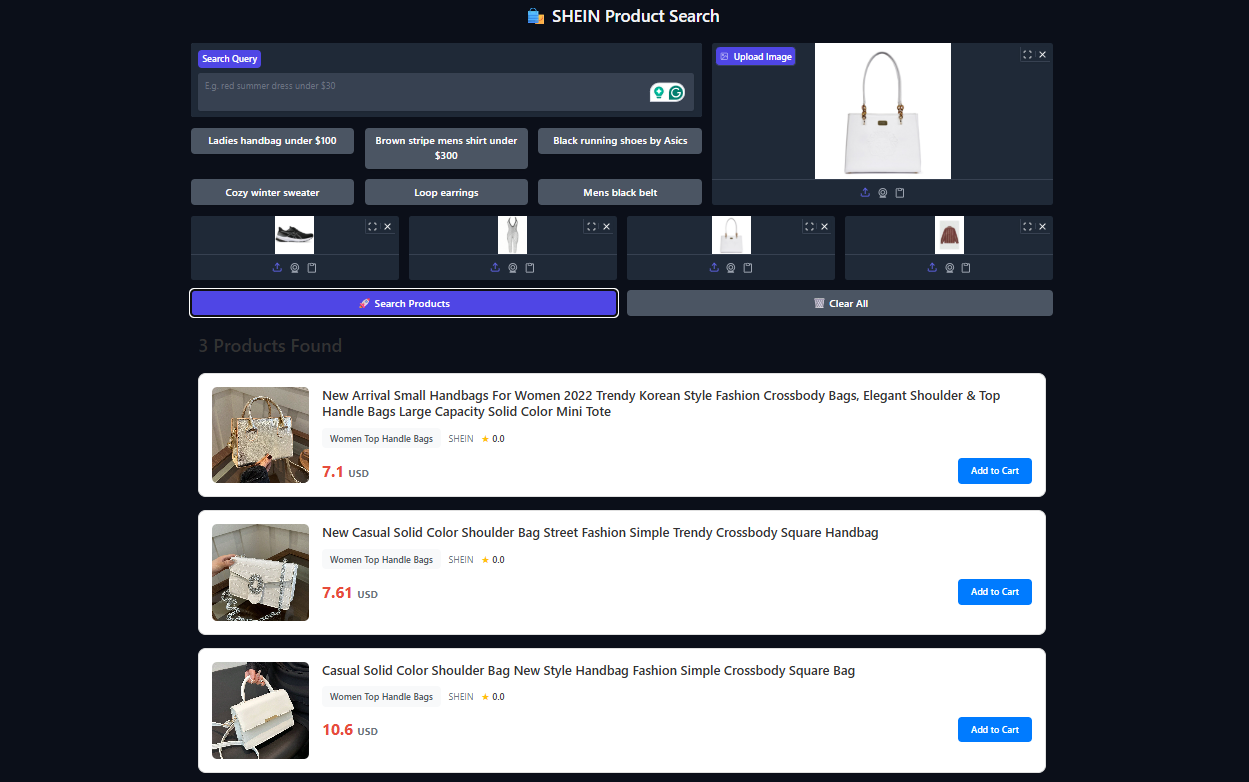